In [ ]:
#Importer les packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM


In [ ]:
# Ouvrir la base de donnees 
df=pd.read_csv('/content/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
data=df[['#Passengers']].values
data

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [9]:
#Préparation de la base de données
#normaliser les donnees 
sc=MinMaxScaler(feature_range=(0,1))
data_scaled=sc.fit_transform(data)

In [10]:
data_scaled

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [11]:

X_data=[]
y_data=[]
look_back=1
for i in range (len(data_scaled)-1):
  X_data.append(data_scaled[i:(i+look_back),0])
  y_data.append(data_scaled[i+look_back,0])
X_data,y_data=np.array(X_data),np.array(y_data)  
print(X_data)
print(y_data)

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]
 [0.07142857]
 [0.05984556]
 [0.04054054]
 [0.08687259]
 [0.12741313]
 [0.12741313]
 [0.1042471 ]
 [0.05598456]
 [0.01930502]
 [0.06949807]
 [0.07915058]
 [0.08880309]
 [0.14285714]
 [0.11389961]
 [0.13127413]
 [0.14285714]
 [0.18339768]
 [0.18339768]
 [0.15444015]
 [0.11196911]
 [0.08108108]
 [0.11969112]
 [0.12934363]
 [0.14671815]
 [0.17181467]
 [0.14864865]
 [0.15250965]
 [0.22007722]
 [0.24324324]
 [0.26640927]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374517]
 [0.17760618]
 [0.17760618]
 [0.25482625]
 [0.25289575]
 [0.24131274]
 [0.26833977]
 [0.30888031]
 [0.32432432]
 [0.25675676]
 [0.20656371]
 [0.14671815]
 [0.18725869]
 [0.19305019]
 [0.16216216]
 [0.25289575]
 [0.23745174]
 [0.25096525]
 [0.30888031]
 [0.38223938]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.19111969]
 [0.24

In [12]:
#Reshaping 
X_data=np.reshape(X_data,(X_data.shape[0],X_data.shape[1],1))

In [13]:
X_data.shape

(143, 1, 1)

In [14]:
#Split data into Test and Train 
train_size=int(len(X_data)*0.7)
test_size=len(X_data)-train_size
X_train=X_data[0:train_size,:]
X_test=X_data[train_size:len(X_data),:]
y_train=y_data[0:train_size]
y_test=y_data[train_size:len(y_data)]

In [17]:
X_train.shape


(100, 1, 1)

In [18]:
y_train.shape

(100,)

In [19]:
X_test.shape

(43, 1, 1)

In [20]:
y_test.shape

(43,)

In [21]:
#Construction de RNN 
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))

model.add(LSTM(units=50, return_sequences=True))

model.add(LSTM(units=50))

#Ajouter la couche de sortie
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 1, 50)             20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
#fiiting model 
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
4/4 [==============================] - 6s 7ms/step - loss: 0.0695
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0630
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0563
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0495
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0427
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0357
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0298
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0232
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0191
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0168
Epoch 11/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0167
Epoch 12/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0175
Epoch 13/100
4/4 [==============================] - 0s 7ms/s

In [23]:
#faire des précisions 
y_pred=model.predict(X_test)


2/2 [==============================] - 1s 6ms/step


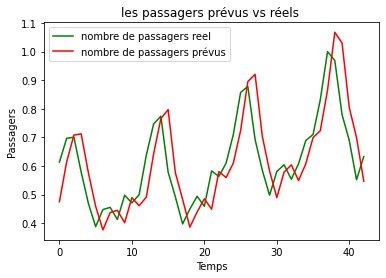

In [25]:
#Visualiser les resultat 
plt.plot(y_test,color='green',label='nombre de passagers reel')
plt.plot(y_pred,color='red',label='nombre de passagers prévus')
plt.title('les passagers prévus vs réels ')
plt.xlabel('Temps')
plt.ylabel('Passagers')
plt.legend()
plt.show()